To install [Altair](https://altair-viz.github.io/index.html):

    # bioconda setup: https://bioconda.github.io/#set-up-channels
    conda config --add channels defaults
    conda config --add channels conda-forge
    conda config --add channels bioconda
    # install altair
    conda install -y altair=2.2.2


In [2]:
import altair as alt
import pandas as pd

In [7]:
# this line is needed for Jupyter notebook to render Altair graphs. Altair is effectively linking Python to the 
# Vega-Lite Javascript framework so Altair needs to know it is running in a notebook
alt.renderers.enable('notebook')

Altair works best with [Pandas](https://pandas.pydata.org/) dataframes. It is called a "declarative" library, in other words instead of telling Altair what to draw, we will tell it what data to associate with what visual elements. Let's start with the function $y = x^2$ over the range of integers 0 through 10.

In [4]:
x = []
y = []
for n in range(11):
    x.append(n)
    y.append(n*n)

In [5]:
# as mentioned above, we need a dataframe. So we start with an empty one and add columns. When you assign to a
# list or series to a key of a dataframe it adds that data as new column using the key as the column name.
df = pd.DataFrame()
df['X'] = x
df['Y'] = y
df

,X,Y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


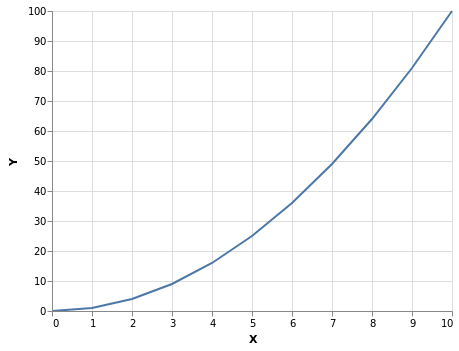

In [8]:
# now we get a chart object - the return value from `alt.Chart()` is a chart object, when this is the last
# value in a Jupyter notebook cell it gets rendered onto the screen.
alt.Chart(df).mark_line().encode(x='X', y='Y')

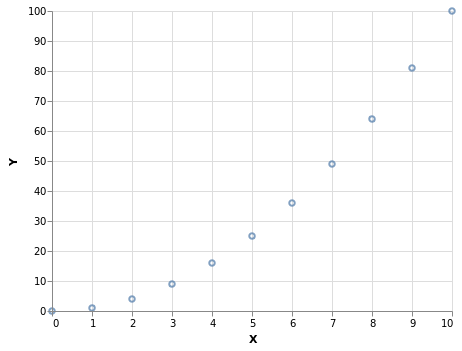

In [10]:
# the two components of the chart are the marks and the association of channels with marks
# 
# the marks are the graphical elements to use - lines, points, etc
#
# the encoding is how we associate columns in the dataframe with attributes of the graphical elements,
# in this case using the 'X' column for the x coordinate and the 'Y' column for the y coordinate
alt.Chart(df).mark_point().encode(x='X', y='Y')

In [11]:
# if we do not associate any data with the marks, all points land on the same x and y coordinate
alt.Chart(df).mark_point().encode()

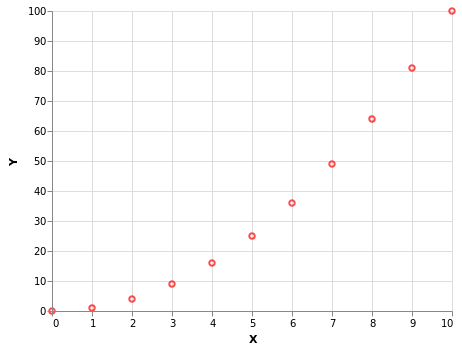

In [12]:
# attributes that affect all the marks are specified by passing parameters to the `mark_point()` method
alt.Chart(df).mark_point(color='red').encode(x='X', y='Y')

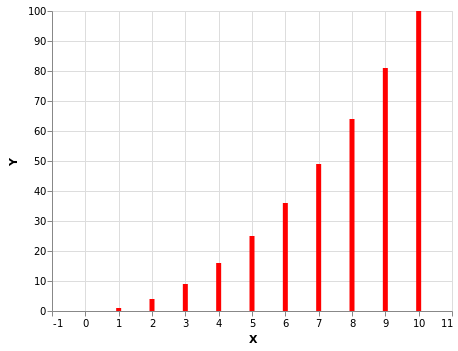

In [13]:
alt.Chart(df).mark_bar(color='red').encode(x='X', y='Y')

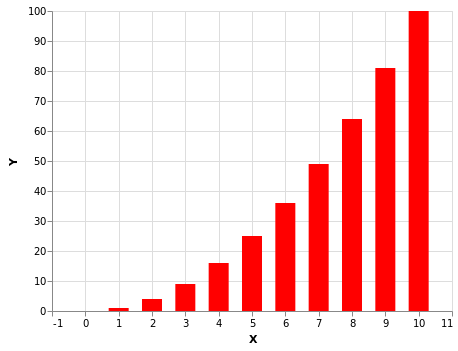

In [14]:
# the size attribute allows us to widen the bars in the bar chart
alt.Chart(df).mark_bar(color='red', size=20).encode(x='X', y='Y')

In [15]:
# we are now adding a "class" to each row - whether the number is even or odd
even_odd = []
for n in range(11):
    if n % 2 == 0:
        even_odd.append('even')
    else:
        even_odd.append('odd')
df['IsEven'] = even_odd
df

,X,Y,IsEven
0,0,0,even
1,1,1,odd
2,2,4,even
3,3,9,odd
4,4,16,even
5,5,25,odd
6,6,36,even
7,7,49,odd
8,8,64,even
9,9,81,odd


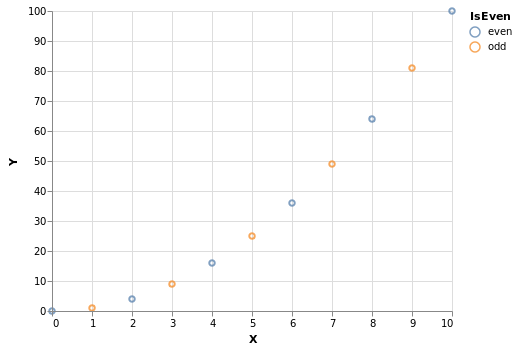

In [16]:
# and associate this class with the "color" channel - channels are described in the Altair
# documentation: https://altair-viz.github.io/user_guide/encoding.html
alt.Chart(df).mark_point().encode(
    x='X', y='Y', color='IsEven')

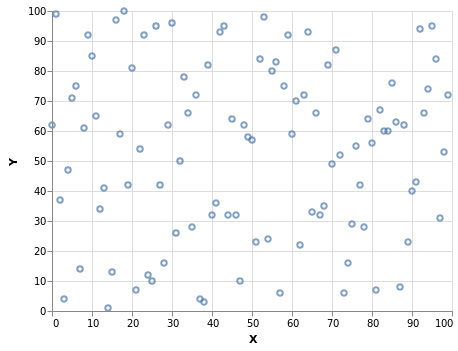

In [17]:
# a dataset of 100 numbers with random y values
import random

df2 = pd.DataFrame()
x = []
y = []
for n in range(100):
    x.append(n)
    y.append(random.randint(0, 100))
df2['X'] = x
df2['Y'] = y

alt.Chart(df2).mark_point().encode(x='X', y='Y')

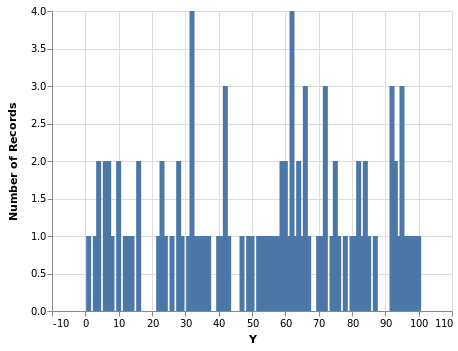

In [18]:
# the Altair library has functions that you can use, e.g. count, to transform the processing
# of data used for encodings. In this example the Y value (magniture) of the points is switched to the 
# X value and the frequency of occurence of the Y value becomes the new Y value. This yields a 
# histogram showing the frequence of values in our dataset.
alt.Chart(df2).mark_bar().encode(x='Y', y='count(Y)')

After the introduction to Altair we moved on to an exploration of Principal Component Analysis in Python. 
This is drawn from this [blog post](https://plot.ly/ipython-notebooks/principal-component-analysis/) with plots
    switched from plot.ly to Altair.

In [19]:
# we load a dataset describing flowers - specifically 3 species of Iris. For each flower there are
# 4 measurements - the sepal length and width and the petal length and width.
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


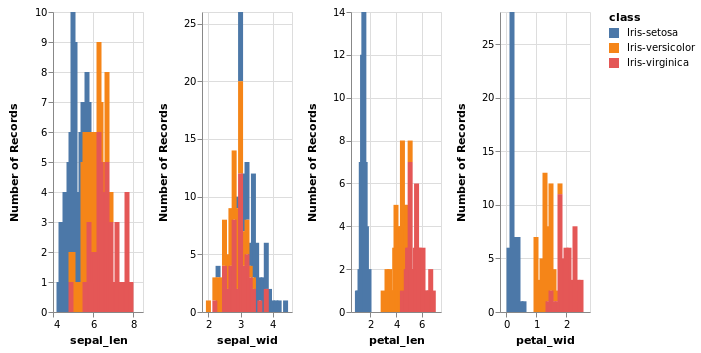

In [22]:
# for each attribute we do a histogram to see how common particular measurements are. We colour each entry
# by the class (i.e. species) of the individual flower. Then we configure the width of each chart. Finally
# the four charts are concatenated horizontally for display.
#
# Python snippet: the `alt.hconcat()` takes multiple parameters, e.g. `alt.hconcat(chart1, chart2)`
# and we have a list of charts. To feed the list into the `hconcat()` function we use the `*` operator
# on the list.
charts = []
for attribute in ('sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'):
    charts.append(alt.Chart(df).mark_bar().encode(x=attribute, y='count()', color='class').properties(width=90))
alt.hconcat(*charts)

The next cells describe the underlying processing of the PCA and illuminate some of the underlying maths.

In [23]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [25]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [26]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

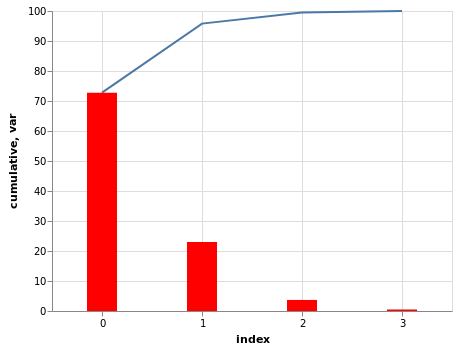

In [29]:
bars = alt.Chart(pd.DataFrame(var_exp, columns=['var']).reset_index()).mark_bar(size=30, color='red').encode(x=alt.X('index', axis=alt.Axis(tickCount=len(var_exp))), y='var')
lines = alt.Chart(pd.DataFrame(cum_var_exp, columns=['cumulative']).reset_index()).mark_line().encode(x='index', y='cumulative')
lines + bars

In [56]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [57]:
Y_sklearn

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

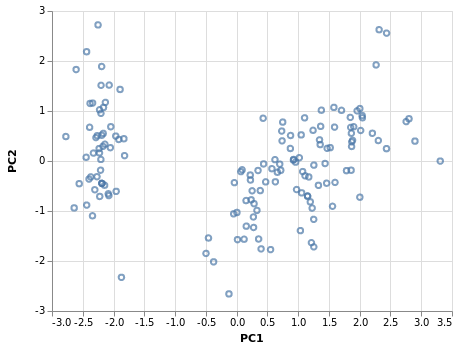

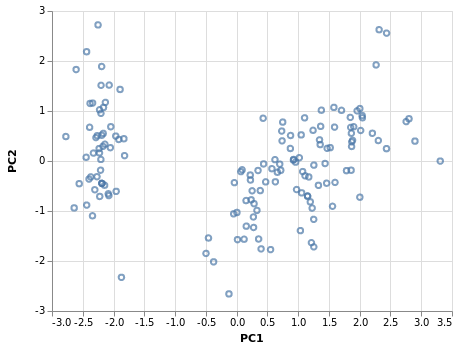

In [58]:
pc_df = pd.DataFrame(Y_sklearn, columns=['PC1', 'PC2'])
alt.Chart(pc_df).mark_point().encode(x='PC1', y='PC2')

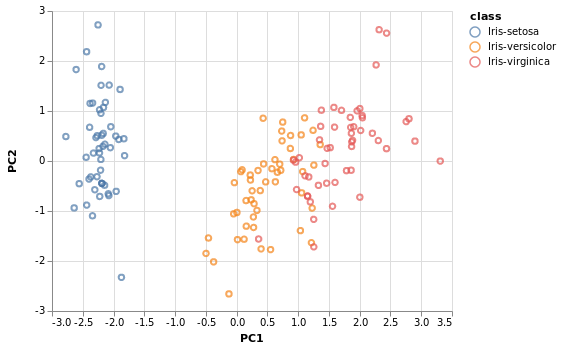

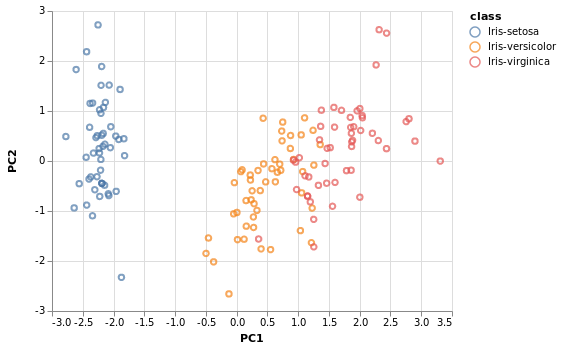

In [59]:
df_with_classes = pd.concat([pc_df, df['class']], axis=1)
alt.Chart(df_with_classes).mark_point().encode(
    x='PC1', y='PC2', color='class')

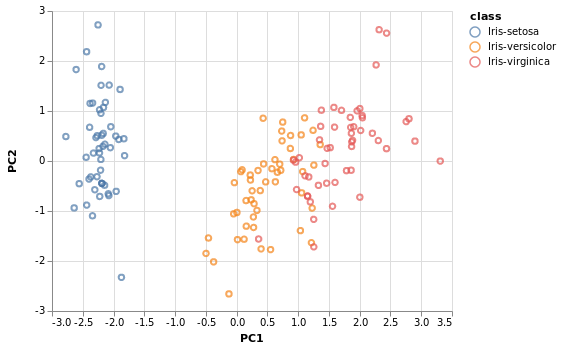

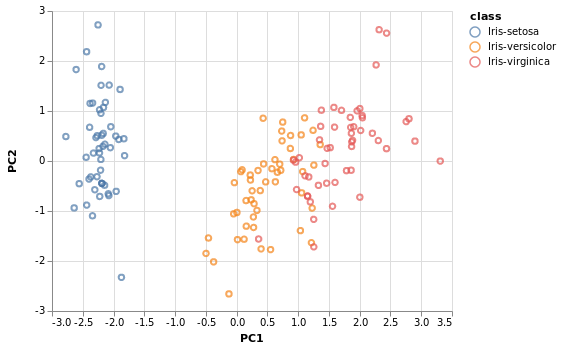

In [61]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

# split data table into data X and class labels y

X = df.iloc[:,0:4].values
# y = df.iloc[:,4].values

# standardise the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# do PCA
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

# plot
pc_df = pd.DataFrame(Y_sklearn, columns=['PC1', 'PC2'])

df_with_classes = pd.concat([pc_df, df['class']], axis=1)
alt.Chart(df_with_classes).mark_point().encode(
    x='PC1', y='PC2', color='class')